<h1> Pnuemonia Detection using Basic CNN Architecture
 

In [ ]:
# Install Libraries
!pip install keras

In [1]:
# Mounted drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Import Libraries
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.preprocessing.image import img_to_array
import os
import pandas as pd
import numpy as np

In [4]:
# Number of images in Train and Test Dataset

# normal condition
print('Train Normal:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/NORMAL/')))
print('Test Normal:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/test/NORMAL/')))
print('Val Normal:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/val/NORMAL/')))
print('\n')

# pneumonia condition
print('Train Pneumonia:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/PNEUMONIA/')))
print('Test Pneumonia:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/test/PNEUMONIA/')))
print('Val Pneumonia:', len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/val/PNEUMONIA/')))

Train Normal: 1341
Test Normal: 234
Val Normal: 8


Train Pneumonia: 3875
Test Pneumonia: 390
Val Pneumonia: 8


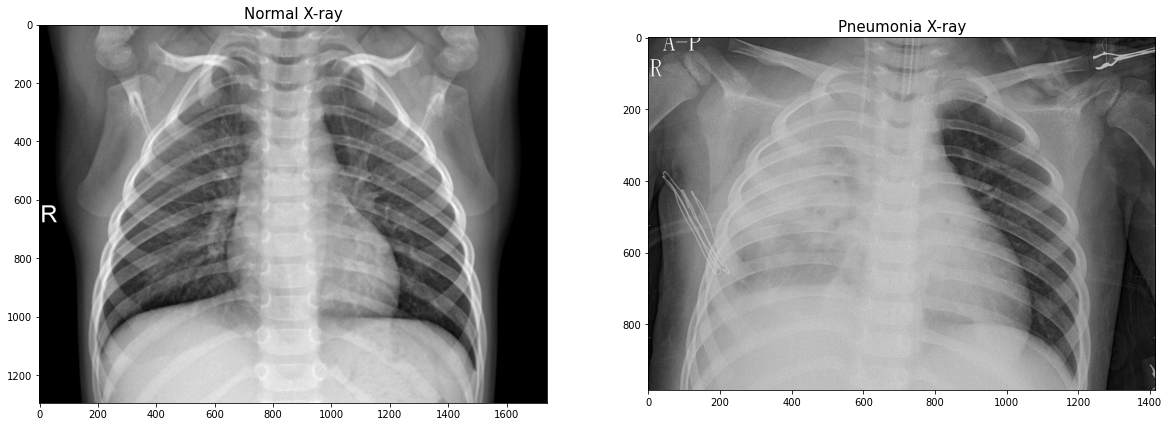

In [6]:
# Check Xray images of Normal and Pneumonia patient

from PIL import Image
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

normal = Image.open('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/NORMAL/NORMAL2-IM-1272-0001.jpeg')
pneu = Image.open('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/PNEUMONIA/person1940_bacteria_4862.jpeg')

fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Normal X-ray', fontsize = 15)
plt.imshow(normal, cmap = 'gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Pneumonia X-ray', fontsize = 15)
plt.imshow(pneu, cmap = 'gray')

* Pneumonia patient's X-Ray has white patches, which indicates that the person is infected.

* In Normal patient's X-Ray, there is absence of white patches, which indicates that the person is not infected.

* But, to classify more clearly and with tiny traits, we will use deep learning algorithms.

In [40]:
img_file = cv2.imread('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/PNEUMONIA/person1940_bacteria_4862.jpeg')
img = cv2.resize(img_file,(256,256))
i = img_to_array(img)
i.shape

(256, 256, 3)

Text(0.5, 1.0, 'Class Distribution in Training data')

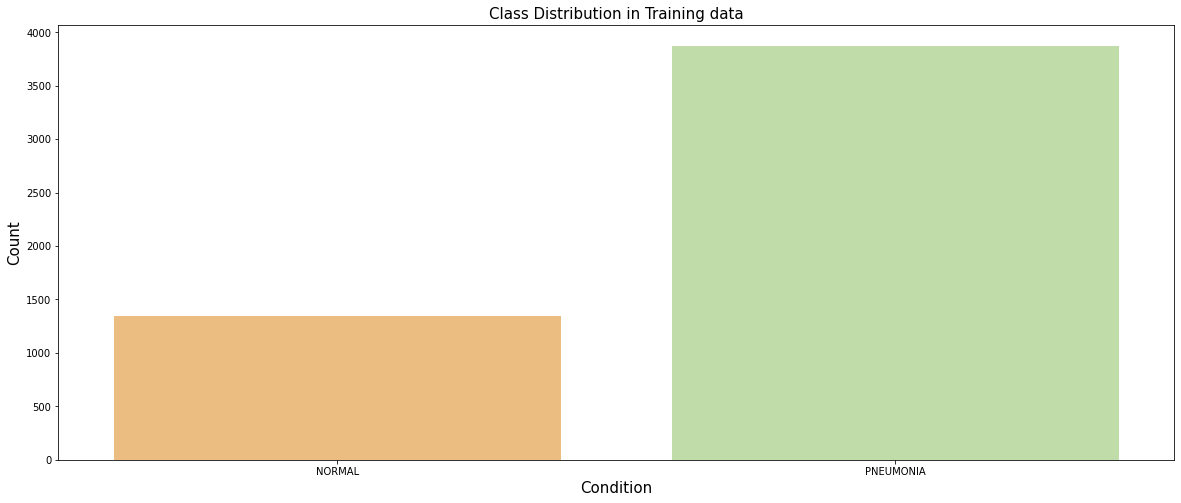

In [8]:
# Check whether data is Balanced or Imbalanced

plt.figure(figsize = (20, 8))
sns.barplot(x = ['NORMAL', 'PNEUMONIA'], 
            y = [len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/NORMAL/')), len(os.listdir('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train/PNEUMONIA/'))],
            palette = 'Spectral')

plt.xlabel('Condition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Class Distribution in Training data', fontsize = 15)

* Above graph concludes that the data set is imbalanced, as there more instances of PNEUMONIA class than NORMAL. Here, the model can get biased and provide better results for PNEUMONIA class than NORMAL. So, Further, we will be using other metrics as well to evaluate model other than Accuracy.

In [54]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [55]:
# Adding a second convolutional layer
# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3),  activation = 'relu'))

# Adding a second Pooling layer
# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [56]:
# Adding a third convolutional layer
# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3),  activation = 'relu'))

# Adding a third Pooling layer
# Step 6 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [57]:
# Step 7 - Flattening
classifier.add(Flatten())

# Step 8 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dropout(0.3))

# Step 9 - Output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
# Summary of Basic CNN model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [ ]:
# Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

# Generating train and test Dataset
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# File path
path1 = '/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/train'
path2 = '/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/test'

# Procesing images before training 
training_set = train_datagen.flow_from_directory(path1,
                                                 target_size = (256, 256),
                                                 batch_size =32 ,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(path2,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Model Fit
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 20,
                         validation_data = test_set,    
                         validation_steps = 19)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
163/163 [==============================] - 3624s 22s/step - loss: 0.4671 - accuracy: 0.7935 - val_loss: 0.4919 - val_accuracy: 0.7780
Epoch 2/20
163/163 [==============================] - 158s 972ms/step - loss: 0.2555 - accuracy: 0.8939 - val_loss: 0.4119 - val_accuracy: 0.7993
Epoch 3/20
163/163 [==============================] - 157s 962ms/step - loss: 0.2174 - accuracy: 0.9149 - val_loss: 0.4354 - val_accuracy: 0.8092
Epoch 4/20
163/163 [==============================] - 155s 952ms/step - loss: 0.2136 - accuracy: 0.9169 - val_loss: 0.4228 - val_accuracy: 0.8306
Epoch 5/20
163/163 [==============================] - 155s 951ms/step - loss: 0.1810 - accuracy: 0.9290 - val_loss: 0.4556 - val_accuracy: 0.8141
Epoch 6/20
163/163 [==============================] - 156s 955ms/step - loss: 0.1639 - accuracy: 0.9337 - val_loss: 0.5268 - val_accuracy: 0.7780
Epoch 7/20
163/163 [==============================] - 157s 964ms/step - loss: 0.1670 - accuracy: 0.9328 - val_loss: 0.3678 - 

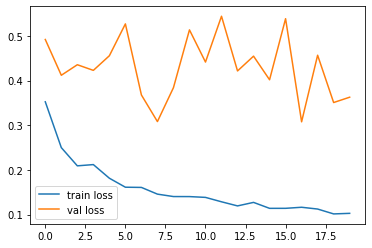

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/LossVal_basic_20')

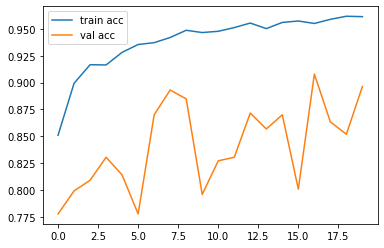

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/AccVal_basic_20')

* Above graph shows that Accuracy is increasing and loss is bit decreasing.

* When the data set is imbalanced, Accuracy can be misleading. So, we will evaluate model performance using other metrics such as precision, recall and F1 score on test data set.

In [ ]:
# Save the model
classifier.save('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/basic_model_20_epochs.h5')


In [43]:
# Creating a label file of test data

import cv2
def picture_separation(folder):
  '''divide the mixed pictures into NORMAL and PNEUMONIA & add labels to these'''
  X = []
  y = []
  image_list = []

  for foldername in os.listdir(folder):
    if not foldername.startswith('.'):
      if foldername == "NORMAL":
        label = 0
      elif foldername == "PNEUMONIA":
        label = 1
      else:
        label = 2
      
      for image_filename in os.listdir(folder + "/"+ foldername):
        img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,1)
        if img_file is not None:
          img = cv2.resize(img_file,(256,256))
          img_arr = img_to_array(img) / 255
          X.append(img_arr)
          y.append(label)
          image_list.append(foldername + '/' + image_filename)
                                        
  X = np.asarray(X)
  y = np.asarray(y)
    
  return X, y, image_list

In [44]:
# get test dataset with labels
X_test, y_test, img_test = picture_separation('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/test/')

test_df = pd.DataFrame(img_test, columns = ["images"])
test_df["target"] = y_test

#preview
test_df.head()

,images,target
0,PNEUMONIA/person100_bacteria_480.jpeg,1
1,PNEUMONIA/person100_bacteria_478.jpeg,1
2,PNEUMONIA/person101_bacteria_483.jpeg,1
3,PNEUMONIA/person100_bacteria_475.jpeg,1
4,PNEUMONIA/person100_bacteria_481.jpeg,1


In [45]:
X_test.shape

(624, 256, 256, 3)

In [30]:
# Load Model
model = keras.models.load_model('/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/basic_model_20_epochs.h5')

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

#make prediction
yhat_test = model.predict_classes(X_test)

#get confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print(cm)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[175  59]
 [  6 384]]


In [47]:
# Visualize Confusion Matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(b = None)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

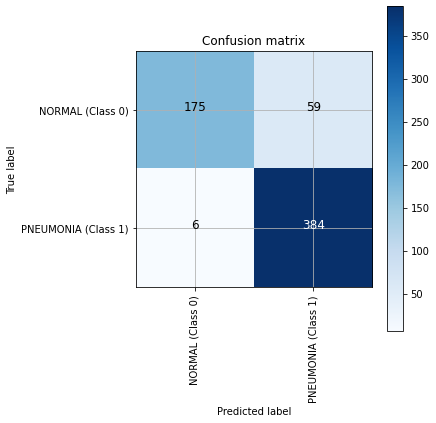

In [48]:
#plot confustion matrix
plot_confusion_matrix(cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

In [50]:
# Classification report to evaluate other metrics

from sklearn.metrics import classification_report

print('Model: Basic CNN Architecture', '\n', classification_report(y_test, yhat_test, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Basic CNN Architecture 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.97      0.75      0.84       234
PNEUMONIA (Class 1)       0.87      0.98      0.92       390

           accuracy                           0.90       624
          macro avg       0.92      0.87      0.88       624
       weighted avg       0.90      0.90      0.89       624



* Above results depicts that model is performing better for PNEUMONIA class. However, still some NORMAL are detected as PNEUMONIA. Check the f1-score of both classes.

AUC: 0.8662393162393163


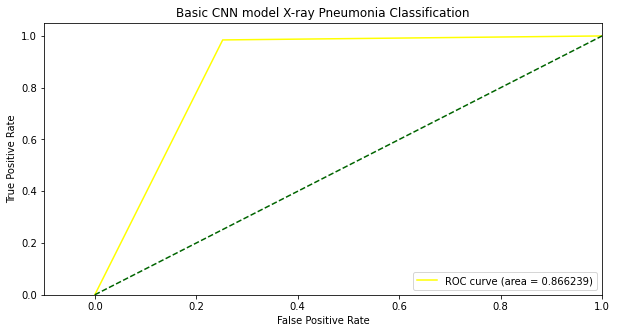

In [53]:
# ROC and AUC curve to evaluate model

from sklearn.metrics import auc,roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, yhat_test)
auc = roc_auc_score(y_test, yhat_test)
print('AUC:', auc)

plt.figure(figsize = (10, 5))
plt.plot(fpr, tpr, color = 'yellow', label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic CNN model X-ray Pneumonia Classification')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# Testing image

import numpy as np
from keras.preprocessing import image
path3 = '/content/drive/MyDrive/Deep Learning/Pnuemonia Detection Project/Data/val/PNEUMONIA/person1954_bacteria_4886.jpeg'
test_image = image.load_img(path3, target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
    print(prediction)
else:
    prediction = 'NORMAL'
    print(prediction)

<h3><b>Model is performing good, but still there are some misclassifications. So, to overcome that, I will be performing transfer learning techniques to enhace the performance.